In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 학습 모델 저장을 위한 라이브러리
import pickle

In [ ]:
# 데이터를 읽어온다.
df = pd.read_csv('/content/drive/MyDrive/data/merge_df.csv')
df.head(5)
df.tail(5)


,기준년월,ID,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,...,청구금액_R3M,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M
2399995,201812,TRAIN_399995,1,1,0,0,0,10755,7267,5640,...,0,0,0,0,0,0,0,0,0,1
2399996,201812,TRAIN_399996,1,1,0,0,0,27636,27636,26357,...,37515,14402,0,4412,5515,9424,3351,4142,4362,1
2399997,201812,TRAIN_399997,1,1,1,1,1,23187,23187,17171,...,22274,5731,0,2694,3046,2998,2524,1523,2898,1
2399998,201812,TRAIN_399998,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2399999,201812,TRAIN_399999,0,0,1,1,1,21463,21463,6984,...,9704,3422,0,980,980,1042,1148,1663,972,1


In [ ]:
# 정확한 경로로 변경!
file_list = glob.glob('/content/drive/MyDrive/data/YR/*.parquet')
print("📄 찾은 파일 리스트:", file_list)

# 읽고 합치기
df_list = [pd.read_parquet(f) for f in file_list]
all_df = pd.concat(df_list, ignore_index=True)

print(all_df.head())

📄 찾은 파일 리스트: ['/content/drive/MyDrive/data/YR/201807_train_회원정보.parquet', '/content/drive/MyDrive/data/YR/201810_train_회원정보.parquet', '/content/drive/MyDrive/data/YR/201811_train_회원정보.parquet', '/content/drive/MyDrive/data/YR/201809_train_회원정보.parquet', '/content/drive/MyDrive/data/YR/201808_train_회원정보.parquet', '/content/drive/MyDrive/data/YR/201812_train_회원정보.parquet']
     기준년월            ID  남녀구분코드   연령 Segment  회원여부_이용가능  회원여부_이용가능_CA  \
0  201807  TRAIN_000000       2  40대       D          1             1   
1  201807  TRAIN_000001       1  30대       E          1             1   
2  201807  TRAIN_000002       1  30대       C          1             1   
3  201807  TRAIN_000003       2  40대       D          1             1   
4  201807  TRAIN_000004       2  40대       E          1             1   

   회원여부_이용가능_카드론  소지여부_신용  소지카드수_유효_신용  ...  할인금액_제휴연회비_B0M  청구금액_기본연회비_B0M  \
0              0        1            1  ...               0             

In [ ]:
# Segment 컬럼만 추출
segment_df = all_df[['기준년월', 'ID', 'Segment']]

# merge
df = pd.merge(df, segment_df, on=['기준년월', 'ID'], how='left')

# 결과 확인
print(df.shape)
print(df[['기준년월', 'ID', 'Segment']].head())


(2400000, 77)
     기준년월            ID Segment
0  201807  TRAIN_000000       D
1  201807  TRAIN_000001       E
2  201807  TRAIN_000002       C
3  201807  TRAIN_000003       D
4  201807  TRAIN_000004       E


In [ ]:
# 인코딩할 범주형 컬럼 목록
categorical_columns = [
    '이용금액대', '이용가능여부_해외겸용_본인', '보유여부_해외겸용_본인',
    '상향가능한도금액', '상향가능CA한도금액', '할인건수_R3M',
    '인입횟수_ARS_R6M', '수신거부여부_TM', '수신거부여부_메일', '수신거부여부_DM'
]

for col in categorical_columns:
    df[col] = df[col].factorize()[0]

df.head()

# 결과 확인
df.head()

,기준년월,ID,이용가능여부_해외겸용_본인,보유여부_해외겸용_본인,수신거부여부_TM,수신거부여부_메일,수신거부여부_DM,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,...,청구금액_B0,할인건수_R3M,월중평잔_일시불_B0M,월중평잔_일시불,평잔_일시불_3M,잔액_일시불_B0M,잔액_일시불_B1M,잔액_일시불_B2M,인입횟수_ARS_R6M,Segment
0,201807,TRAIN_000000,0,0,0,0,0,196,196,3681,...,12226,0,1084,1503,1791,998,736,1083,0,D
1,201807,TRAIN_000001,0,0,0,0,0,13475,13475,13323,...,5834,0,4090,4447,3761,2565,6795,1424,1,E
2,201807,TRAIN_000002,1,1,0,0,0,23988,23988,24493,...,21866,0,5006,5540,6796,5312,5150,6143,1,C
3,201807,TRAIN_000003,1,1,0,0,0,3904,3904,5933,...,16356,0,487,606,772,730,462,708,0,D
4,201807,TRAIN_000004,1,1,0,0,0,1190,0,0,...,0,0,0,0,0,0,0,0,1,E


In [ ]:
df.to_csv('/content/drive/MyDrive/data/YR/train_df_encoded.csv', index=False)
print("✅ 인코딩 후 CSV 저장 완료!")

✅ 인코딩 후 CSV 저장 완료!


PCA

In [ ]:
# pca 사용

# n_components : 축소될 결과의 컬럼 개수
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

# 결과 데이터를 제거한다.
X = df.drop(['기준년월', 'ID', 'Segment'], axis=1)

# 학습한다.
pca.fit(X)
# 데이터를 변환한다.
r1 = pca.transform(X)
r1

array([[-2.24355293e+03,  7.31778228e+04, -2.33070671e+04, ...,
         8.36920485e+03, -6.30901464e+03,  1.23217849e+03],
       [-4.12359358e+03, -1.85967998e+04, -5.28155393e+03, ...,
         3.87790321e+03, -8.89924578e+02,  3.03199814e+03],
       [ 9.38444950e+04,  1.23215256e+05, -2.11108391e+04, ...,
         9.42522722e+03,  1.94373729e+03, -1.43578502e+02],
       ...,
       [ 1.75905958e+04,  3.33447438e+03,  5.99649294e+03, ...,
         2.11539105e+03, -9.19578187e+02,  2.82021287e+03],
       [-7.50896539e+04, -3.66573195e+03, -3.62002012e+03, ...,
         8.45090150e+01, -3.02824774e+02, -6.92984228e+02],
       [-3.57877045e+04,  4.33569086e+03,  7.98641356e+03, ...,
        -4.21440999e+03, -7.64997832e+03, -4.99739765e+03]])

In [ ]:
# 결과 데이터를 데이터프레임으로 변환
pca_df = pd.DataFrame(r1, columns=[f'p{i+1}' for i in range(r1.shape[1])])

# Segment 컬럼을 원본 df에서 가져와서 붙이기
pca_df['Segment'] = df['Segment'].values

# 결과 확인
pca_df.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,Segment
0,-2243.552932,73177.822751,-23307.067101,7561.747681,-3243.689945,4528.594709,-4408.328899,8369.204848,-6309.014637,1232.178489,D
1,-4123.593576,-18596.799844,-5281.553927,552.003969,2047.728561,2851.121294,-2005.535562,3877.903213,-889.924578,3031.998141,E
2,93844.494983,123215.256247,-21110.839099,-7111.076140,-5582.733394,13547.760968,-1048.762695,9425.227218,1943.737286,-143.578502,C
3,10648.448210,115700.176919,-21742.094578,11510.390683,-7770.532197,-7559.367414,-5333.651779,13026.736618,-76.952366,259.298026,D
4,-76132.442560,-2534.422667,-1881.492818,724.219681,-55.011442,-2366.802627,-931.083210,71.543289,-16.547835,-290.180409,E


In [14]:
# CSV로 저장
pca_df.to_csv('/content/drive/MyDrive/data/YR/pca_final_df.csv', index=False)
print("✅ CSV 파일 저장 완료!")

✅ CSV 파일 저장 완료!


In [13]:
print("원래 변수 개수 :", len(X.columns))
print("축소 후 주성분 개수 :", pca_df.shape[1] - 1)

원래 변수 개수 : 74
축소 후 주성분 개수 : 10


In [ ]:
!apt-get -qq install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

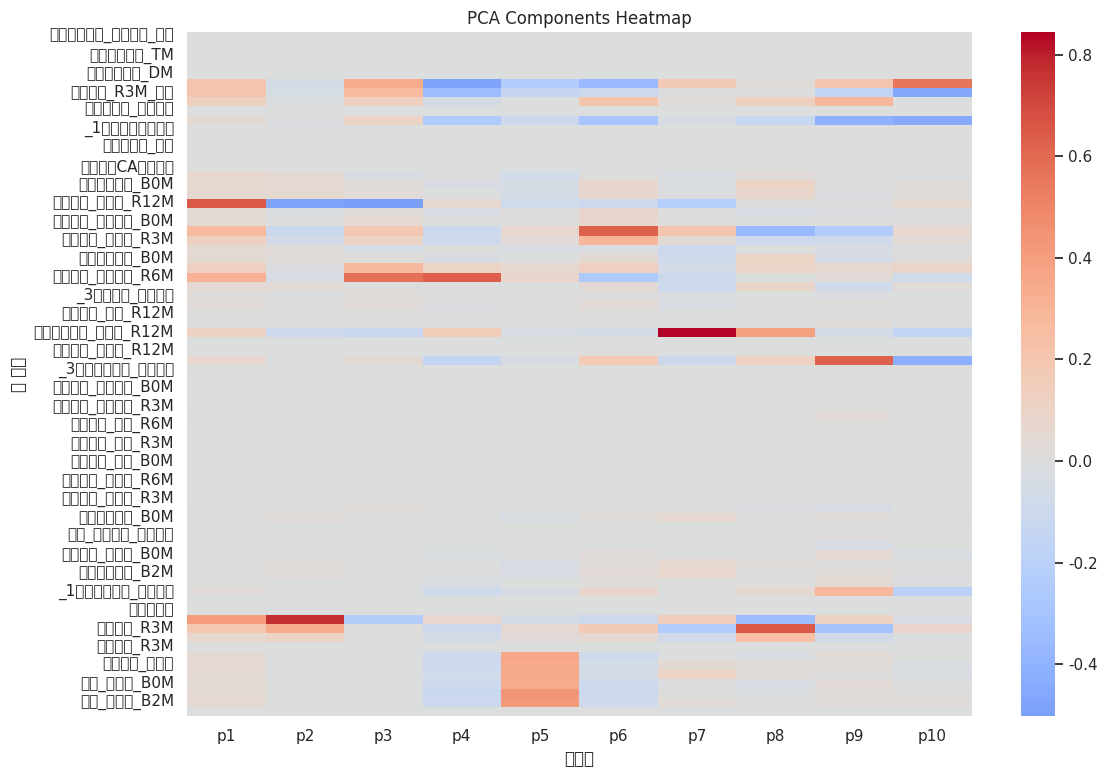

In [ ]:
# PCA component 데이터프레임 만들기
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'p{i+1}' for i in range(pca.n_components_)]
)

# heatmap 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components.T, cmap='coolwarm', center=0)
plt.title('PCA Components Heatmap')
plt.xlabel('주성분')
plt.ylabel('원 변수')
plt.tight_layout()
plt.show()

LDA

In [ ]:
X = df.drop(['기준년월', 'ID', 'Segment'], axis=1)
y = df['Segment']

# =====================
# 🌟 2. Segment 숫자형 변환
# =====================
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# =====================
# 🌟 3. LDA 수행
# =====================
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)  # 시각화 목적이면 2
X_lda = lda.fit_transform(X, y_encoded)

# =====================
# 🌟 4. LDA 결과를 DataFrame으로
# =====================
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Segment'] = y.values

# 결과 확인
display(lda_df.head())



,LD1,LD2,Segment
0,-1.838471,0.024936,D
1,-0.078962,0.872747,E
2,-2.794161,-2.027469,C
3,-2.712584,-0.926268,D
4,0.960764,-0.158414,E


In [ ]:
!apt-get -qq install fonts-nanum

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

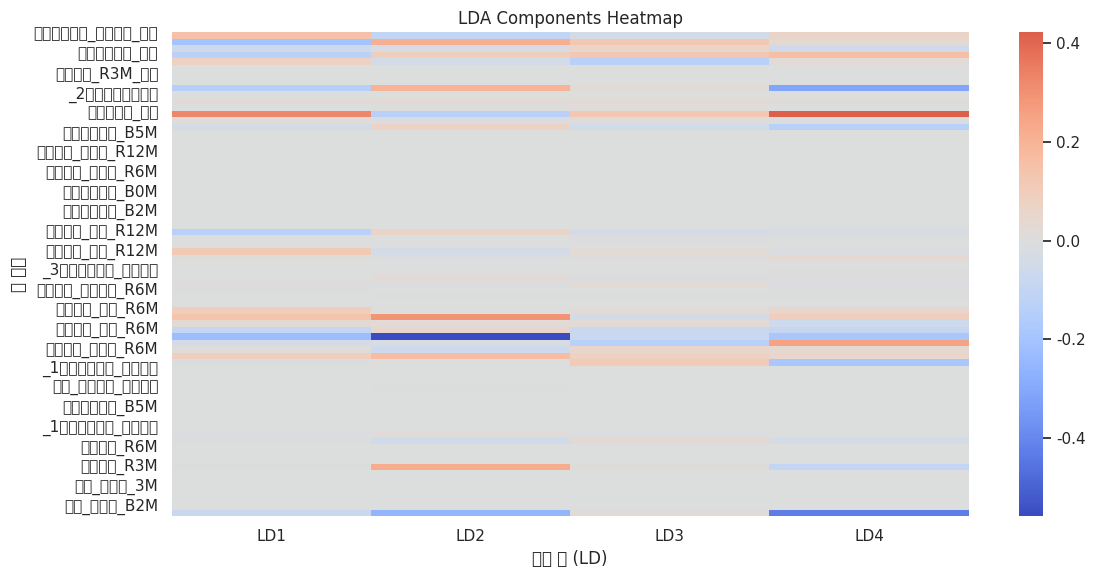

In [ ]:
# 원 변수 이름 가져오기
features = X.columns

# scalings_ : 각 변수의 판별축 기여 가중치
lda_components = pd.DataFrame(
    lda.scalings_,
    index=features,
    columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])]
)

# Heatmap 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(lda_components, cmap='coolwarm', center=0)
plt.title('LDA Components Heatmap')
plt.xlabel('판별 축 (LD)')
plt.ylabel('원 변수')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier

# 1. X, y 분리
X = df.drop(['기준년월', 'ID', 'Segment'], axis=1)
y = df['Segment']

# 2. Segment 숫자형 변환
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 3. PCA, LDA 변환
pca = PCA(n_components=10)
pca_X = pca.fit_transform(X)

lda = LDA(n_components=4)
lda_X = lda.fit_transform(X, y_encoded)

# 4. 모델 정의 (GPU 설정)
model1 = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                       n_jobs=-1, verbosity=0, use_label_encoder=False)
model2 = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                       n_jobs=-1, verbosity=0, use_label_encoder=False)
model3 = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor',
                       n_jobs=-1, verbosity=0, use_label_encoder=False)

# 5. 교차검증 설정
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


# 6. 교차검증 수행
r1 = cross_val_score(model1, X, y_encoded, scoring='accuracy', cv=kfold)
r2 = cross_val_score(model2, pca_X, y_encoded, scoring='accuracy', cv=kfold)
r3 = cross_val_score(model3, lda_X, y_encoded, scoring='accuracy', cv=kfold)

# 7. 결과 출력
print(f'원본 데이터 평균 정확도: {r1.mean():.4f}')
print(f'PCA 데이터 평균 정확도: {r2.mean():.4f}')
print(f'LDA 데이터 평균 정확도: {r3.mean():.4f}')

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7c8d3c284d50>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 582, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument

KeyboardInterrupt: 
